In [1]:
!pip install -U openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 14.9 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 13120, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 13120 (delta 1), reused 13 (delta 0), pack-reused 13093
Receiving objects: 100% (13120/13120), 15.72 MiB | 16.50 MiB/s, done.
Resolving deltas: 100% (9431/9431), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.8/648.8 KB 27.0 MB/s eta 0:00:00
  Running setup.py develop for mmsegmentation


In [3]:
%cd /content

/content


In [4]:
!rm -rf /content/7c068d10-6532-418f-b0d9-519889835847

In [5]:
!unzip /content/7c068d10-6532-418f-b0d9-519889835847.zip > /dev/null

In [5]:
%cd /content/mmsegmentation

/content/mmsegmentation


In [7]:
!mkdir -p /content/7c068d10-6532-418f-b0d9-519889835847/ImageSets/Segmentation

In [1]:
from glob import glob
import os
from PIL import Image
import numpy as np
from fastprogress import progress_bar as pb
from sklearn.preprocessing import LabelEncoder

In [2]:
def convert_up_seg_image(imgs, outdir):
    os.makedirs(outdir, exist_ok=True)
    for img in imgs:
        out_path = os.path.join(outdir, os.path.basename(img).split('.')[0] + '.jpg')
        Image.open(img).convert('RGB').save(out_path)

In [3]:
def rgb_to_class(pixel):
    assert len(pixel) == 3
    return (pixel[0] << 16) + (pixel[1] << 8) + pixel[2]


def convert_rgb_seg_anno_to_class_anno(anno_imgs, outdir):
    os.makedirs(outdir, exist_ok=True)
    anno_imgs_index = [np.apply_along_axis(rgb_to_class, -1, np.array(Image.open(ai).convert('RGB')).astype(int)) for ai in pb(anno_imgs)]
    le = LabelEncoder()
    org_shape = np.stack(anno_imgs_index).shape
    anno_imgs_label = le.fit_transform(np.stack(anno_imgs_index).flatten()).reshape(*org_shape)
    anno_imgs_label = anno_imgs_label.astype(np.uint8)
    assert anno_imgs_label.shape[0] == len(anno_imgs)
    for i, anno_img in enumerate(anno_imgs):
        out_path = os.path.join(outdir, os.path.basename(anno_img).replace('segmentation', 'rgb'))
        anno_label_img = anno_imgs_label[i]
        Image.fromarray(anno_label_img, 'L').save(out_path)
    return anno_imgs_label, le

In [11]:
imgs = glob('/content/7c068d10-6532-418f-b0d9-519889835847/RGB0dee5504-d342-4811-8756-5472c2020496/*')

In [12]:
len(imgs)

100

In [13]:
convert_up_seg_image(imgs, outdir='/content/7c068d10-6532-418f-b0d9-519889835847/JPEGImages')

In [14]:
np.array(Image.open('/content/7c068d10-6532-418f-b0d9-519889835847/JPEGImages/rgb_10.jpg')).shape

(399, 872, 3)

In [15]:
np.array(Image.open('/content/7c068d10-6532-418f-b0d9-519889835847/RGB0dee5504-d342-4811-8756-5472c2020496/rgb_10.png')).shape

(399, 872, 4)

In [16]:
with open('/content/7c068d10-6532-418f-b0d9-519889835847/ImageSets/Segmentation/train.txt', 'w') as f:
    for img in imgs:
        f.write(img.split('/')[-1].split('.')[0] + '\n')

In [17]:
with open('/content/7c068d10-6532-418f-b0d9-519889835847/ImageSets/Segmentation/trainval.txt', 'w') as f:
    for img in imgs:
        f.write(img.split('/')[-1].split('.')[0] + '\n')

In [18]:
with open('/content/7c068d10-6532-418f-b0d9-519889835847/ImageSets/Segmentation/val.txt', 'w') as f:
    for img in imgs:
        f.write(img.split('/')[-1].split('.')[0] + '\n')

In [19]:
anno_imgs = glob('/content/7c068d10-6532-418f-b0d9-519889835847/SemanticSegmentation9d078642-d82d-431e-9ead-65b784e0f2aa/*')

In [20]:
len(anno_imgs)

100

In [21]:
anno_imgs_label, le = convert_rgb_seg_anno_to_class_anno(anno_imgs, '/content/7c068d10-6532-418f-b0d9-519889835847/SegmentationClass')

In [22]:
le.classes_

array([  0, 255])

In [23]:
np.array(Image.open('/content/7c068d10-6532-418f-b0d9-519889835847/SegmentationClass/rgb_82.png')).shape

(399, 872)

In [24]:
np.unique(np.array(Image.open('/content/7c068d10-6532-418f-b0d9-519889835847/SegmentationClass/rgb_82.png')).flatten())

array([0, 1], dtype=uint8)

In [25]:
import matplotlib.pyplot as plt

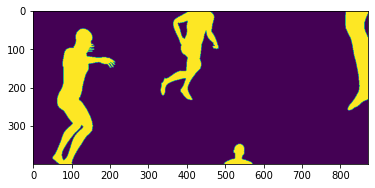

In [26]:
plt.imshow(np.array(Image.open('/content/7c068d10-6532-418f-b0d9-519889835847/SegmentationClass/rgb_82.png')))

In [4]:
import os.path as osp
import numpy as np
from PIL import Image
import mmcv
import matplotlib.pyplot as plt

data_root = '/content/7c068d10-6532-418f-b0d9-519889835847'
img_dir = 'JPEGImages'
ann_dir = 'SegmentationClass'

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [28]:
!cp /content/mmsegmentation/configs/deeplabv3plus/deeplabv3plus_r50-d8_512x512_20k_voc12aug.py /content/deeplabv3plus_r50-d8_512x512_20k_voc12aug_custom.py

In [11]:
!cat /content/deeplabv3plus_r50-d8_512x512_20k_voc12aug_custom.py

_base_ = [
    '/content/mmsegmentation/configs/_base_/models/deeplabv3plus_r50-d8.py',
    #'../_base_/datasets/pascal_voc12_aug.py', '../_base_/default_runtime.py',
    '/content/mmsegmentation/configs/_base_/datasets/pascal_voc12.py', '/content/mmsegmentation/configs/_base_/default_runtime.py',

    '/content/mmsegmentation/configs/_base_/schedules/schedule_20k.py'
]
model = dict(
    decode_head=dict(num_classes=2), auxiliary_head=dict(num_classes=2))

In [11]:
!cat /content/mmsegmentation/mmseg/datasets/voc.py

# Copyright (c) OpenMMLab. All rights reserved.
import os.path as osp

from .builder import DATASETS
from .custom import CustomDataset


@DATASETS.register_module()
class PascalVOCDataset(CustomDataset):
    """Pascal VOC dataset.

    Args:
        split (str): Split txt file for Pascal VOC.
    """

    # CLASSES = ('background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    #            'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog',
    #            'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa',
    #            'train', 'tvmonitor')

    # PALETTE = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0], [0, 0, 128],
    #            [128, 0, 128], [0, 128, 128], [128, 128, 128], [64, 0, 0],
    #            [192, 0, 0], [64, 128, 0], [192, 128, 0], [64, 0, 128],
    #            [192, 0, 128], [64, 128, 128], [192, 128, 128], [0, 64, 0],
    #            [128, 64, 0], [0, 192, 0], [128, 192, 0], [0, 64, 128]]

    CLASSES = ['Unlabeled', 'person']

In [30]:
from mmcv import Config

cfg = Config.fromfile('/content/deeplabv3plus_r50-d8_512x512_20k_voc12aug_custom.py')

In [31]:
classes = ['Unlabeled', 'person']
palette = [[0,0,0], [255, 0, 0]]

In [32]:
from mmseg.apis import set_random_seed

cfg.checkpoint_config.meta = dict(
   CLASSES=classes,
    PALETTE=palette)

cfg.device = 'cuda'

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg

cfg.model.decode_head.num_classes = len(classes)
cfg.model.auxiliary_head.num_classes = len(classes)

cfg.dataset_type = 'PascalVOCDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu=4

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.classes = classes
cfg.data.train.palette = palette
#cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.classes = classes
cfg.data.val.palette = palette
#cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.classes = classes
cfg.data.test.palette = palette
#cfg.data.test.split = 'splits/val.txt'

cfg.load_from = 'https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r50-d8_512x512_40k_voc12aug/deeplabv3plus_r50-d8_512x512_40k_voc12aug_20200613_161759-e1b43aa9.pth'

cfg.work_dir = '/content/mmsegmentation/work_dirs/up'

cfg.runner.max_iters = 800
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DepthwiseSeparableASPPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        dilations=(1, 12, 24, 36),
        c1_in_channels=256,
        c1_channels=48,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_in

In [33]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

datasets = [build_dataset(cfg.data.train)]

model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

model.CLASSES = datasets[0].CLASSES

2023-01-13 05:08:12,822 - mmseg - INFO - Loaded 100 images
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/decode_heads/decode_head.py:94: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert seg_logist into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [34]:
model.CLASSES

['Unlabeled', 'person']

In [35]:
cfg.data.train

{'type': 'PascalVOCDataset',
 'data_root': '/content/7c068d10-6532-418f-b0d9-519889835847',
 'img_dir': 'JPEGImages',
 'ann_dir': 'SegmentationClass',
 'split': 'ImageSets/Segmentation/train.txt',
 'pipeline': [{'type': 'LoadImageFromFile'},
  {'type': 'LoadAnnotations'},
  {'type': 'Resize', 'img_scale': (2048, 512), 'ratio_range': (0.5, 2.0)},
  {'type': 'RandomCrop', 'crop_size': (512, 512), 'cat_max_ratio': 0.75},
  {'type': 'RandomFlip', 'prob': 0.5},
  {'type': 'PhotoMetricDistortion'},
  {'type': 'Normalize',
   'mean': [123.675, 116.28, 103.53],
   'std': [58.395, 57.12, 57.375],
   'to_rgb': True},
  {'type': 'Pad', 'size': (512, 512), 'pad_val': 0, 'seg_pad_val': 255},
  {'type': 'DefaultFormatBundle'},
  {'type': 'Collect', 'keys': ['img', 'gt_semantic_seg']}],
 'classes': ['Unlabeled', 'person'],
 'palette': [[0, 0, 0], [255, 0, 0]]}

In [36]:
!rm -rf {osp.abspath(cfg.work_dir)}

In [37]:
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

In [38]:
train_segmentor(model, datasets, cfg, distributed=False, validate=True, meta=dict())

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
2023-01-13 05:08:36,985 - mmseg - INFO - Loaded 100 images
2023-01-13 05:08:36,987 - mmseg - INFO - load checkpoint from http path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r50-d8_512x512_40k_voc12aug/deeplabv3plus_r50-d8_512x512_40k_voc12aug_20200613_161759-e1b43aa9.pth
2023-01-13 05:08:37,150 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([21, 512, 1, 1]) from checkpoint,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 4.2 task/s, elapsed: 24s, ETA:     0s

2023-01-13 05:14:03,396 - mmseg - INFO - per class results:
2023-01-13 05:14:03,398 - mmseg - INFO - 
+-----------+-------+-------+
|   Class   |  IoU  |  Acc  |
+-----------+-------+-------+
| Unlabeled | 94.54 | 97.47 |
|   person  | 50.41 | 64.86 |
+-----------+-------+-------+
2023-01-13 05:14:03,401 - mmseg - INFO - Summary:
2023-01-13 05:14:03,404 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.83 | 72.48 | 81.17 |
+-------+-------+-------+
2023-01-13 05:14:03,406 - mmseg - INFO - Iter(val) [100]	aAcc: 0.9483, mIoU: 0.7248, mAcc: 0.8117, IoU.Unlabeled: 0.9454, IoU.person: 0.5041, Acc.Unlabeled: 0.9747, Acc.person: 0.6486
2023-01-13 05:14:20,116 - mmseg - INFO - Iter [210/800]	lr: 7.638e-03, eta: 0:16:02, time: 4.039, data_time: 2.648, memory: 7332, decode.loss_ce: 0.1805, decode.acc_seg: 91.9864, aux.loss_ce: 0.0880, aux.acc_seg: 90.4689, loss: 0.2686
2023-01-13 05:14:34,119 - mmseg - INFO - Iter [220/800]	lr: 7.524e-03, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 4.3 task/s, elapsed: 24s, ETA:     0s

2023-01-13 05:19:31,152 - mmseg - INFO - per class results:
2023-01-13 05:19:31,154 - mmseg - INFO - 
+-----------+-------+-------+
|   Class   |  IoU  |  Acc  |
+-----------+-------+-------+
| Unlabeled | 96.61 | 98.56 |
|   person  |  66.3 | 77.13 |
+-----------+-------+-------+
2023-01-13 05:19:31,156 - mmseg - INFO - Summary:
2023-01-13 05:19:31,163 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 96.82 | 81.45 | 87.85 |
+-------+-------+-------+
2023-01-13 05:19:31,164 - mmseg - INFO - Iter(val) [100]	aAcc: 0.9682, mIoU: 0.8145, mAcc: 0.8785, IoU.Unlabeled: 0.9661, IoU.person: 0.6630, Acc.Unlabeled: 0.9856, Acc.person: 0.7713
2023-01-13 05:19:47,929 - mmseg - INFO - Iter [410/800]	lr: 5.298e-03, eta: 0:10:37, time: 4.024, data_time: 2.636, memory: 7332, decode.loss_ce: 0.1175, decode.acc_seg: 95.4759, aux.loss_ce: 0.0592, aux.acc_seg: 94.1881, loss: 0.1767
2023-01-13 05:20:01,980 - mmseg - INFO - Iter [420/800]	lr: 5.178e-03, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 4.3 task/s, elapsed: 24s, ETA:     0s

2023-01-13 05:24:58,247 - mmseg - INFO - per class results:
2023-01-13 05:24:58,248 - mmseg - INFO - 
+-----------+-------+-------+
|   Class   |  IoU  |  Acc  |
+-----------+-------+-------+
| Unlabeled | 96.77 | 99.31 |
|   person  |  65.2 | 70.32 |
+-----------+-------+-------+
2023-01-13 05:24:58,251 - mmseg - INFO - Summary:
2023-01-13 05:24:58,254 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 96.96 | 80.99 | 84.82 |
+-------+-------+-------+
2023-01-13 05:24:58,258 - mmseg - INFO - Iter(val) [100]	aAcc: 0.9696, mIoU: 0.8099, mAcc: 0.8482, IoU.Unlabeled: 0.9677, IoU.person: 0.6520, Acc.Unlabeled: 0.9931, Acc.person: 0.7032
2023-01-13 05:25:14,793 - mmseg - INFO - Iter [610/800]	lr: 2.828e-03, eta: 0:05:10, time: 4.000, data_time: 2.610, memory: 7332, decode.loss_ce: 0.0914, decode.acc_seg: 96.5606, aux.loss_ce: 0.0513, aux.acc_seg: 95.0078, loss: 0.1427
2023-01-13 05:25:28,803 - mmseg - INFO - Iter [620/800]	lr: 2.699e-03, eta: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 4.3 task/s, elapsed: 23s, ETA:     0s

2023-01-13 05:30:24,925 - mmseg - INFO - per class results:
2023-01-13 05:30:24,927 - mmseg - INFO - 
+-----------+-------+-------+
|   Class   |  IoU  |  Acc  |
+-----------+-------+-------+
| Unlabeled | 97.69 | 99.36 |
|   person  | 75.18 | 80.68 |
+-----------+-------+-------+
2023-01-13 05:30:24,930 - mmseg - INFO - Summary:
2023-01-13 05:30:24,931 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 97.84 | 86.44 | 90.02 |
+-------+-------+-------+
2023-01-13 05:30:24,935 - mmseg - INFO - Iter(val) [100]	aAcc: 0.9784, mIoU: 0.8644, mAcc: 0.9002, IoU.Unlabeled: 0.9769, IoU.person: 0.7518, Acc.Unlabeled: 0.9936, Acc.person: 0.8068


In [39]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
import mmcv

In [40]:
model.cfg = cfg

In [41]:
model.eval()

EncoderDecoder(
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [42]:
img = mmcv.imread('/content/7c068d10-6532-418f-b0d9-519889835847/JPEGImages/rgb_82.jpg')

In [43]:
result = inference_segmentor(model, img)

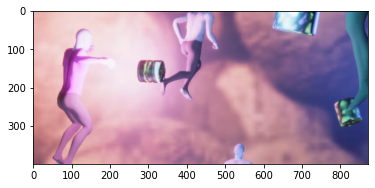

In [44]:
plt.imshow(img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


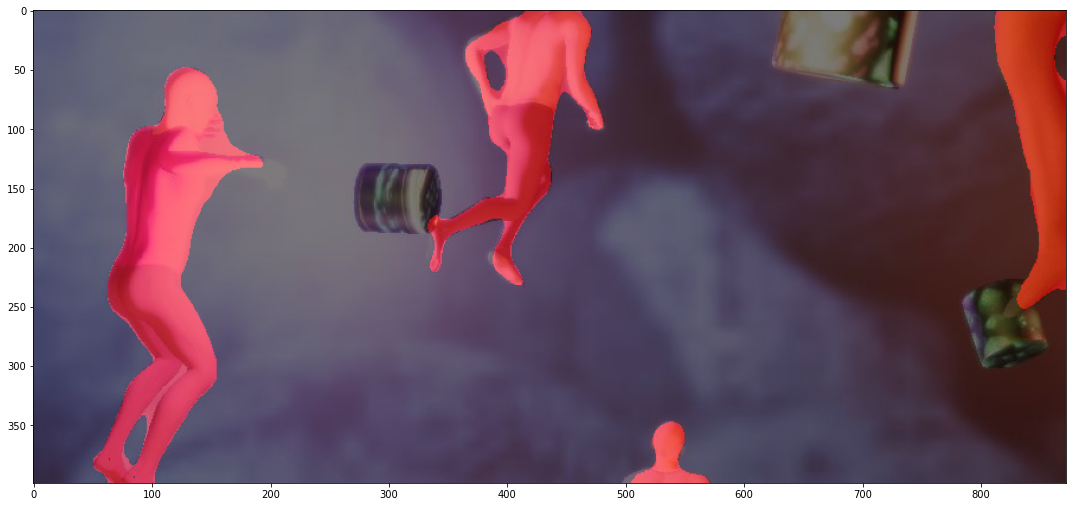

In [45]:
show_result_pyplot(model, img, result, palette)

In [50]:
cfg_str = cfg.dump()

In [51]:
cfg_str

"norm_cfg = dict(type='BN', requires_grad=True)\nmodel = dict(\n    type='EncoderDecoder',\n    pretrained='open-mmlab://resnet50_v1c',\n    backbone=dict(\n        type='ResNetV1c',\n        depth=50,\n        num_stages=4,\n        out_indices=(0, 1, 2, 3),\n        dilations=(1, 1, 2, 4),\n        strides=(1, 2, 1, 1),\n        norm_cfg=dict(type='BN', requires_grad=True),\n        norm_eval=False,\n        style='pytorch',\n        contract_dilation=True,\n        pretrained='open-mmlab://resnet50_v1c'),\n    decode_head=dict(\n        type='DepthwiseSeparableASPPHead',\n        in_channels=2048,\n        in_index=3,\n        channels=512,\n        dilations=(1, 12, 24, 36),\n        c1_in_channels=256,\n        c1_channels=48,\n        dropout_ratio=0.1,\n        num_classes=2,\n        norm_cfg=dict(type='BN', requires_grad=True),\n        align_corners=False,\n        loss_decode=dict(\n            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),\n    auxiliary_hea

In [53]:
with open('/content/cfg.py', 'w') as f:
    f.write(cfg_str)

In [54]:
!cat /content/cfg.py

norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True,
        pretrained='open-mmlab://resnet50_v1c'),
    decode_head=dict(
        type='DepthwiseSeparableASPPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        dilations=(1, 12, 24, 36),
        c1_in_channels=256,
        c1_channels=48,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',

In [55]:
trained_model = init_segmentor('/content/cfg.py', '/content/mmsegmentation/work_dirs/up/latest.pth', device='cuda')

/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/decode_heads/decode_head.py:94: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert seg_logist into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: /content/mmsegmentation/work_dirs/up/latest.pth


In [65]:
trained_cfg = Config.fromfile('/content/cfg.py')

In [56]:
result = inference_segmentor(trained_model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


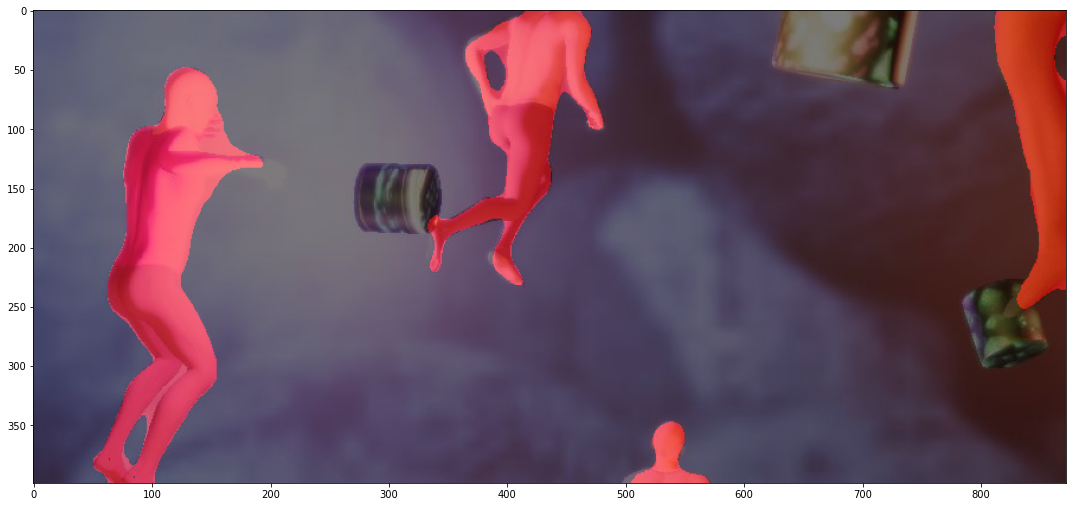

In [66]:
show_result_pyplot(model, img, result, trained_model.cfg.checkpoint_config.meta.PALETTE)